In [1]:
import rasterio
from rasterio.plot import reshape_as_image
import os
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import glob
from pyproj import crs
import tqdm
%matplotlib inline

In [2]:
# define the Jupiter globe for the mosaic projection
globe = ccrs.Globe(semimajor_axis=71492e3, semiminor_axis=66851e3)

In [9]:
# load the file list (this is a subset of just the GRS images)
files = sorted(glob.glob('geotiffs_original/GRS_PJ_27*.tif'))

print(f"Found {len(files)} files")

Found 32 files


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████| 32/32 [03:31<00:00,  6.59s/it]


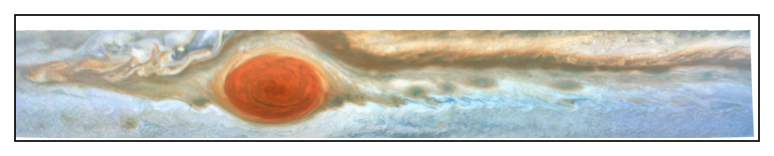

In [10]:
projection = ccrs.PlateCarree(globe=globe)

fig, ax = plt.subplots(1, 1, dpi=150, subplot_kw={'projection': projection})

# set the extent so we can see the final image properly
ax.set_extent([-74, 26, -27, -10], crs=projection)

for file in tqdm.tqdm(files):
    # open the raster from the GeoTIFF
    raster = rasterio.open(file)

    # transpose the dimensions so that we can plot it -- the GeoTIFF bands are B, G, R, UV, Methane
    arr = reshape_as_image(raster.read())

    # fetch the projection from the file and define the bounds since it is not defined in the CRS
    laea = ccrs.Projection(raster.crs)

    # the segments are 16000x16000km across so 8000km from the center
    laea.bounds = (-8e6, 8e6, -8e6, 8e6)

    # choose the axes (RGB) for plotting and plot the image
    ax.imshow(arr[:, :, [2, 1, 0]], vmin=0, vmax=1, extent=(-8e6, 8e6,-8e6, 8e6), transform=laea, interpolation='hermite')


plt.show()